In [1]:
import numpy as np
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# from sklearn import cross_validation, metrics
from sklearn import metrics
from sklearn import linear_model
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import statsmodels.regression.linear_model
from statsmodels.tools.tools import add_constant
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
%matplotlib inline

In [2]:
X = np.load('var.npy')
y = np.load('count.npy')
X[np.isnan(X)] = 0
# X = add_constant(X)

In [3]:
# preprocessing ZCA code from https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

In [4]:
%%time
X = zca_whitening_matrix(X)

CPU times: user 4h 35min 4s, sys: 10min 31s, total: 4h 45min 35s
Wall time: 2h 8min 35s


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf = rfc(n_estimators=10, oob_score=False, random_state=10, n_jobs=4, min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train,y_train)
# print(rf.score)
# print (rf.oob_score_)
# y_pred = rf0.predict(X_test)

# plt.figure(figsize=(6,6))
# im = plt.imshow(confusion_matrix(y_test, y_pred), interpolation='none')
# plt.show()

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=True, random_state=10, verbose=0, warm_start=False)>
0.254865687748


In [12]:
rf.score(X_train,y_train)

0.98951709253478248

In [13]:
rf.score(X_test,y_test)

0.25258215962441316

In [16]:
importances = rf.feature_importances_

Feature ranking:
1. feature 2 (0.049534)
2. feature 4 (0.048050)
3. feature 3 (0.045544)
4. feature 6 (0.045384)
5. feature 10 (0.045183)
6. feature 1 (0.044021)
7. feature 5 (0.043569)
8. feature 34 (0.042619)
9. feature 7 (0.042082)
10. feature 13 (0.041333)
11. feature 24 (0.039589)
12. feature 20 (0.038933)
13. feature 8 (0.037777)
14. feature 17 (0.036365)
15. feature 9 (0.035510)
16. feature 22 (0.035450)
17. feature 14 (0.035023)
18. feature 21 (0.034658)
19. feature 11 (0.034352)
20. feature 19 (0.029737)
21. feature 23 (0.028641)
22. feature 26 (0.026177)
23. feature 16 (0.025759)
24. feature 15 (0.022417)
25. feature 12 (0.019524)
26. feature 25 (0.018137)
27. feature 28 (0.014622)
28. feature 30 (0.011670)
29. feature 31 (0.010076)
30. feature 18 (0.006064)
31. feature 27 (0.004756)
32. feature 29 (0.004174)
33. feature 33 (0.002767)
34. feature 32 (0.000506)
35. feature 0 (0.000000)


NameError: name 'titanic_short' is not defined

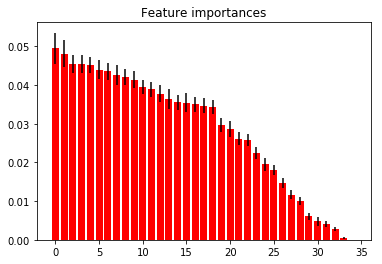

In [19]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), titanic_short.columns[indices])
plt.xlim([-1, X_test.shape[1]])

plt.show()

In [ ]:
estimator = rf.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')